# SI 618: Clustering

## Outline for today

* Clustering techniques
	* K-Means
	* Agglomerative
* Applications
	* Handwriting Data Exploration
	* Document Clustering
* Evaluation

In [10]:
MY_UNIQNAME = 'huangmy'

In [10]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Clustering:
* formulate problem -- select distance measure -- clustering procedure -- decide number of clusters -- interpret clusters
* data understanding -- navigation
* application field: Health -- Business -- social network -- information retrieval -- speech understanding

* clusters can be ambiguous -- determine the proper number of clusters
* in soft clustering, an object can belong to several clusters
* Heirarchical methods: agglomerative, single-link, etc. Partitional: k-means, k-median, etc.

### Strength of Hierarchical methods:
* No need to assume any particular number of clusters
* Number of clusters can be achieved by cutting the frame
* Bottom-up or Top-down methods: start from a single big cluster or start from each single point

## 1. K-Means Clustering

Let's use k-means to cluster some image data:

>We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format. 

>We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds. 

>These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to write only inside these boxes. If they make a mistake or are unhappy with their writing, they are instructed to clear the content of a box by using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input devices, but subjects are not aware of this. 

In [2]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
digits = load_digits()
data = scale(digits.data, axis=1)

In [3]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [4]:
print(data)

[[-0.88626612 -0.88626612  0.07837728 ... -0.88626612 -0.88626612
  -0.88626612]
 [-0.75601439 -0.75601439 -0.75601439 ...  0.78982973 -0.75601439
  -0.75601439]
 [-0.85336948 -0.85336948 -0.85336948 ...  1.68689315  0.57552825
  -0.85336948]
 ...
 [-0.86716376 -0.86716376 -0.7187721  ...  0.0231862  -0.86716376
  -0.86716376]
 [-0.86573282 -0.86573282 -0.54359968 ...  1.06706603 -0.86573282
  -0.86573282]
 [-0.97282752 -0.97282752  0.61546231 ...  0.93312027 -0.81399853
  -0.97282752]]


In [5]:
print(data.shape)
print(type(data))

(1797, 64)
<class 'numpy.ndarray'>


What does `scale()` do?

In [14]:
n_samples, n_features = data.shape
print(n_samples, n_features)

1797 64


Let's see what they look like. We actually have a set of 8×8-pixel images of digits.

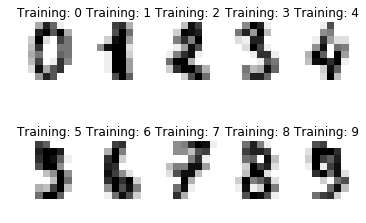

In [15]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

As we saw last week though, we can represent lots of things as plain arrays of numbers, which makes it easy to do data processing on it with numpy and other Python libraries.

Clustering is typically useful for exploratory data analysis, so let's do just that.

In [44]:
from sklearn.cluster import KMeans

# digits.target is the numbers from 0-9
n_digits = len(np.unique(digits.target))
print(n_digits)
k_means = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
k_means.fit(data)

10


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

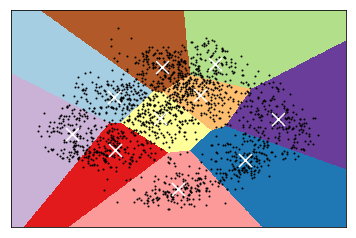

In [43]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

We actually know how many clusters we should have here – there are 10 digits. But what if we don't know what *k* should be?

### Picking K – How many clusters?

A number of clustering methods, such as k-means, assumes the parameter k (#clusters) is known in advance, which is often not the case in practice. A number of techniques exist for determining the number of clusters in a dataset. See [this Wikipedia page](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for a detailed discussion.

In this section, we focus on four of the approaches:

1. Educated guessing
	* What are some criteria you could use?
2. Rule of thumb
3. The Elbow Method
4. The Silhouette Approach

Let us see if all the methods listed above will be able to recover the true number of clusters.

### Rule of Thumb

By rule of thumb, we could potentially choose the number of clusters as simply


$$ k \approx \sqrt{n/2} $$

where $n$ is the number of observations.

## The Elbow Method (Scree Plot)

Here, we plot the percentage of variance explained as a function of the number of clusters.

As we increase *k*, this percentage will naturally increase. Where we see diminishing returns to increasing *k* is a good place to stop, which corresponds to the "elbow" in the graph. This is a bit of an art, since the elbow is not unambiguous.

![](data/resources-lab8/elbow.png)

## The Silhouette Method

The silhouette coefficient is a measure of how closely a particular datum is matched to data and how loosely it is matched to data of that neighboring cluster.

You'd therefore expect that a datum that's a good match for its cluster to have a silhouette of 1, and a data that's a poor match to have a score of -1.

We can find the average silhouette of the data for particular values of *k*, and choose the maximum.

![](data/resources-lab8/silhouette.png)

## Q1. (12 Points) Use these three methods (rule of thumb, elbow, and silhouette) to determine the ideal number of clusters

For the elbow and silhouette methods, plot the scores for 5 to 15 clusters.

Hints:

* Use inertia, the within-cluster sum of squares as the criterion for the elbow method. This is [available](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) in your `k_means` result as `k_means.inertia_`.
* The silhouette score can be computed with [sklearn.metrics.silhouette\_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score). `silhouette_score` takes two arguments: `data` and `k_means.labels_`.

In [55]:
# rule of thumb
num_thumb = round(np.sqrt(n_samples/2))
k_means_thumb = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
print(k_means_thumb.fit(data))
print('number of clusters in Rule of Thumb')
print(num_thumb)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
number of clusters in Rule of Thumb
30.0


(1, 15.5)

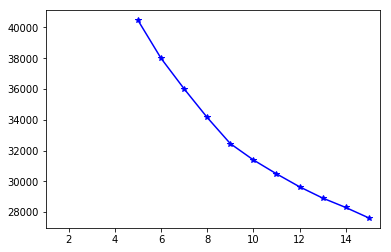

In [53]:
from sklearn import metrics

# Use inertia, the within-cluster sum of squares as the criterion for the elbow method
cost = []
for k in range(5, 16):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data)
    cost.append(k_means.inertia_)  # here k_means.inertia_ represents the elbow

fig, ax = plt.subplots()
plt.plot(range(5, 16), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])

(1, 15.5)

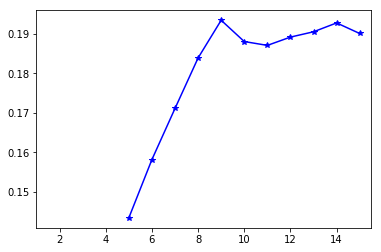

In [54]:
cost = []
for k in range(5, 16):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data)
    cost.append(metrics.silhouette_score(data, k_means.labels_)) 
    # Here represents takes two arguments: data and k_means.labels_

fig, ax = plt.subplots()
plt.plot(range(5, 16), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])

### Comment:
* Results under these three methods are different. 
* Proper number of clusters under rule of thumb should be 30.
* Under Elbow method, by observing diminishing returns to increasing k, we can tell that k around 13 would be proper in this data set.
* Under silhouette method, we need to find the average silhouette of the data for particular values of k, and choose the maximum. Thus k around 9 would be proper in this data set.

## END Q1

## Agglomerative Clustering

Agglomerative clustering works from the bottom up, by comparing obervations such that each observation starts in its *own* cluster, and clusters are recursively merged together until there's only one cluster left. Using this method, we can build a hierarchy of clusters.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Hierarchical_clustering_simple_diagram.svg/418px-Hierarchical_clustering_simple_diagram.svg.png)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Orange-data-mining-hierarchical-clustering.png/800px-Orange-data-mining-hierarchical-clustering.png)

Of course, hierarchical clusters can be built the other way, starting from one cluster that represents all the data, and breaking clusters apart successively. This is called *divisive* clustering.

Let's use the Project Gutenberg dataset from HW 4 and perform hierarchical clustering on the set of books we have.

We're going to use spaCy to preprocess our text.

In [11]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [12]:
import spacy
import pathlib
from spacy.lang.en.stop_words import STOP_WORDS

# nlp = spacy.load('en')

gutenberg = pd.read_json('data/homework4/gutenberg-dammit-files/gutenberg-metadata.json')
data_path = pathlib.Path.cwd()/'data'/'homework4'/'gutenberg-dammit-files'

documents = []
count = 0
print(len(gutenberg['gd-path']))
for x in gutenberg['gd-path']:
    file_path = data_path/x
    f = open(str(file_path), "r", encoding='utf-8')
    documents.append(f.read())
    count = count + 1
    if count%400 == 0:
        print(count)
    f.close()
    
gutenberg['text'] = documents

gutenberg.head(2)

4000
400
800
1200
1600
2000
2400
2800
3200
3600
4000


,Author,Author Birth,Author Death,Author Given,Author Surname,Copyright Status,Language,LoC Class,Num,Subject,Title,charset,gd-num-padded,gd-path,href,text
0,[Giacomo Casanova],[1725],[1798],[Giacomo],[Casanova],[Public domain in the USA.],[English],[D],39301,"[Casanova, Giacomo, 1725-1798, Europe -- Histo...","[The Memoirs of Jacques Casanova de Seingalt, ...",us-ascii,39301,393/39301.txt,/sup_gut/39301.zip,ENLARGE TO FULL SIZE\n\n\n\n\tCONTENTS\n\n\n\t...
1,[Alexander Wheelock Thayer],[1817],[1897],[Alexander Wheelock],[Thayer],[Public domain in the USA.],[English],NaN,43591,NaN,"[The Life of Ludwig van Beethoven, Volume I]",us-ascii,43591,435/43591.txt,/sup_gut/43591.zip,THE LIFE OF LUDWIG VAN BEETHOVEN\n VOLUME I...


In [13]:
documents_reduce = documents[0:100]

Next, we'll create a *TF-IDF matrix*.

![](http://www.jiem.org/index.php/jiem/article/viewFile/293/252/2402)

**TF**: Term Frequency – aggregate word counts within a document

**IDF**: Inverse Document Frequency – weights of how rare a term is across documents

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

def process_text(text):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~0123456789'''
    text = text.lower().replace('\n', ' ').replace('\t',' ').split()
#     text = map(lambda x: [y for y in x if y not in punctuations],text)
#     text = map(lambda x: [y for y in x if y not in STOP_WORDS],text)
    return text

tfidf_vectorizer = TfidfVectorizer(
    max_df=0.8, max_features=200000,
    min_df=0.2, stop_words='english',
    use_idf=True, tokenizer=process_text, ngram_range=(1,3)
)

tfidf_matrix = tfidf_vectorizer.fit_transform(documents_reduce)

print(tfidf_matrix.shape)

(100, 7065)


In [18]:
print(tfidf_matrix[0:1])

  (0, 5646)	0.0014347098344815515
  (0, 1385)	0.005278487636775796
  (0, 7008)	0.0667718550999536
  (0, 161)	0.0022992515105630033
  (0, 1120)	0.0027581339372242954
  (0, 1082)	0.03189973078762967
  (0, 3170)	0.002098162025543724
  (0, 3172)	0.0014533403006786643
  (0, 3373)	0.0015328343403753356
  (0, 6591)	0.0015121619364092086
  (0, 6625)	0.0015759601089844052
  (0, 6636)	0.001554089141549178
  (0, 172)	0.0024684830512685034
  (0, 6638)	0.0015759601089844052
  (0, 3375)	0.0015759601089844052
  (0, 6983)	0.0015759601089844052
  (0, 6985)	0.0016959737124703333
  (0, 6987)	0.0016456553675123357
  (0, 177)	0.0016456553675123357
  (0, 3939)	0.018145943236910503
  (0, 1005)	0.003996210091724595
  (0, 6989)	0.0016959737124703333
  (0, 6991)	0.001807955945140583
  (0, 6995)	0.001939504799020044
  (0, 181)	0.002505592714136939
  :	:
  (0, 1238)	0.000969752399510022
  (0, 3625)	0.000919377979074765
  (0, 2901)	0.000969752399510022
  (0, 3856)	0.0033407902855159184
  (0, 5495)	0.00093543349881

Remember cosine similarity? We're going to use it as the basis of a distance calculation. How do we turn similarity into distance?

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print(dist)

[[-1.11022302e-15  5.61093509e-01  5.12741714e-01 ...  7.72272231e-01
   5.36059677e-01  3.98695248e-01]
 [ 5.61093509e-01  0.00000000e+00  7.74178520e-01 ...  8.71060114e-01
   7.13268577e-01  6.81850493e-01]
 [ 5.12741714e-01  7.74178520e-01  0.00000000e+00 ...  6.25518975e-01
   3.86817396e-01  4.27887329e-01]
 ...
 [ 7.72272231e-01  8.71060114e-01  6.25518975e-01 ...  3.33066907e-16
   6.50338644e-01  7.30744290e-01]
 [ 5.36059677e-01  7.13268577e-01  3.86817396e-01 ...  6.50338644e-01
  -2.22044605e-16  5.05396334e-01]
 [ 3.98695248e-01  6.81850493e-01  4.27887329e-01 ...  7.30744290e-01
   5.05396334e-01  2.22044605e-15]]


C:\Users\TK\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\TK\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\TK\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


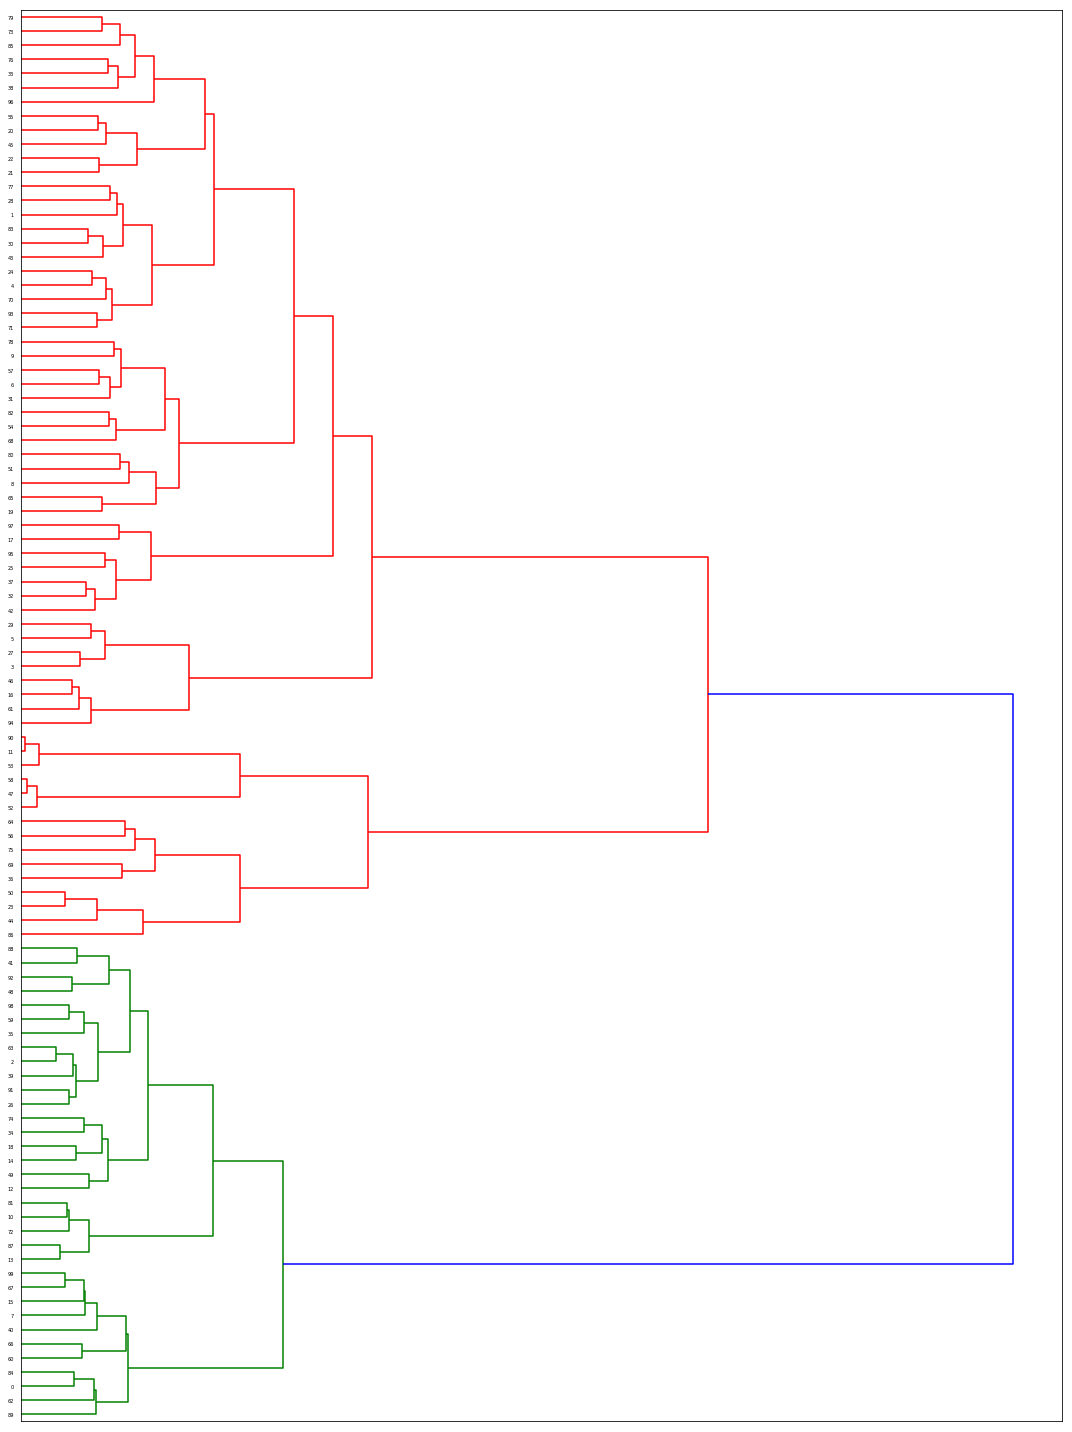

In [66]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist)
fig, ax = plt.subplots(figsize=(15, 20))
# ax = dendrogram(linkage_matrix, orientation="right", labels=titles);
ax = dendrogram(linkage_matrix, orientation="right");

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

We seem to have a similar problem as before… how many clusters do we really have?

You might have some intuition about how to decide on this. What do you think?

### Comment:
* Intuitively, we can set a threshold for the number of clusters that we want to keep. Thus we can draw a vertical line and tell the number of points of intersection as the number of cluster, e.g 10 clusters if we want.

## Q2. (4 Points) What is a criterion that you might be able to use to determine how many clusters are in the dataset from looking at the dendrogram?

### Comment:
* Let us suppose that we want to find a proper number within 10-20 as our number of clusters. We want to let our data be clustered almost evenly in each cluster if possible. In other words, all clusters should have almost the same number of sample size. Thus once the crierion can be satisfied, that number should be proper for data set.There is trade-off between clusters number and bias definitely.

Use this method to select the number of clusters, and explore your clusters.

## Q3. (4 Points) How would you determine the commonalities between these clusters of documents?

### Comment:
* for each cluster, we can calculate the average of words vectors using all the average word vectors of each document. Once we get our own average word vectors for each cluster, we can use cosine similarity scores again to measure the similarity of clusters.

Let's make some word clouds.

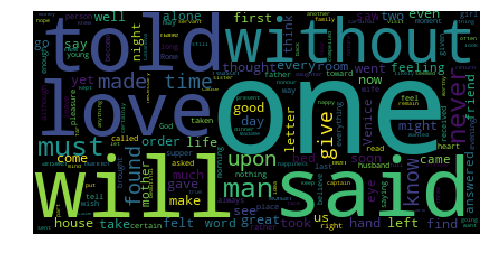

In [57]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(documents[0])
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.show()

## Q4. (12 Points) Generate a word cloud for each of your clusters. Do you think the clusters fit your expectation about which books are similar?

In [104]:
# count the number of documents in each cluster
def count_num(number_):
    list0 = []
    total = list(fcluster(linkage_matrix, number_, criterion='maxclust'))
    for i in range(1, number_+1):
        list0.append(total.count(i))
    print('number for ' + str(number_) + ' cluster')
    print(list0)

for i in range(1, 8):
    count_num(i)

number for 1 cluster
[100]
number for 2 cluster
[34, 66]
number for 3 cluster
[34, 15, 51]
number for 4 cluster
[34, 15, 8, 43]
number for 5 cluster
[34, 9, 6, 8, 43]
number for 6 cluster
[34, 9, 6, 8, 7, 36]
number for 7 cluster
[34, 9, 6, 8, 7, 13, 23]


* The number of documents in each cluster under different clusters number has been given in the output.
* We should avoid using too many clusters. Thus 4 clusters should be proper for this data.

In [105]:
from scipy.cluster.hierarchy import fcluster 
# choose a k
k = 4
fcluster(linkage_matrix, k, criterion='maxclust')

array([1, 4, 1, 3, 4, 3, 4, 1, 4, 4, 1, 2, 1, 1, 1, 1, 3, 4, 1, 4, 4, 4,
       4, 2, 4, 4, 1, 3, 4, 3, 4, 4, 4, 4, 1, 1, 2, 4, 4, 1, 1, 1, 4, 4,
       2, 4, 3, 2, 1, 1, 2, 4, 2, 2, 4, 4, 2, 4, 2, 1, 1, 3, 1, 1, 2, 4,
       1, 1, 4, 2, 4, 4, 1, 4, 1, 2, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 2, 1,
       1, 1, 2, 1, 1, 4, 3, 4, 4, 4, 1, 1], dtype=int32)

In [106]:
result = list(fcluster(linkage_matrix, k, criterion='maxclust'))
def cluster_docu(num):
    string = ''
    for i in range(len(result)):
        if num == result[i]:
            string = string + documents_reduce[i]
    return string          

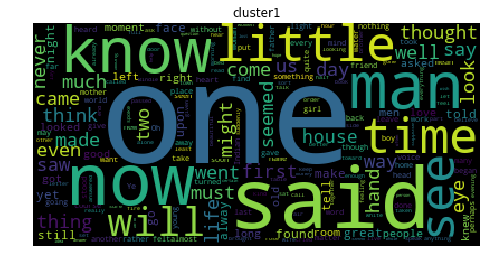

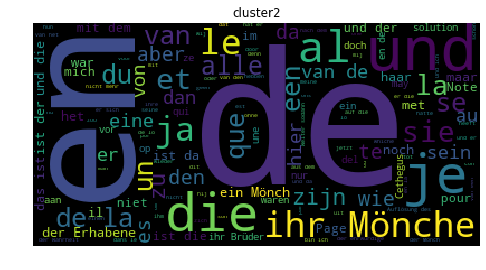

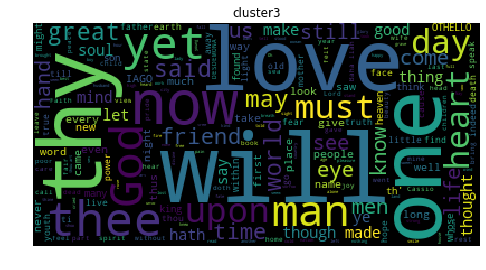

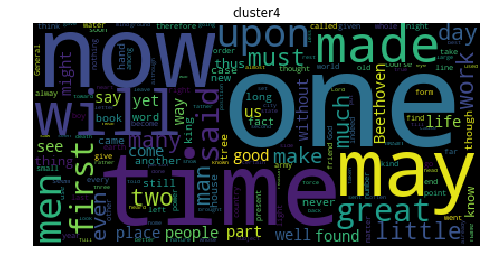

In [107]:
def wordcloud_draw(number_to_draw):
    for i in range(1, number_to_draw+1):
        cluster = cluster_docu(i)
        wordcloud = WordCloud().generate(cluster)
        plt.figure(figsize = (8, 8), facecolor = None) 
        plt.imshow(wordcloud)
        plt.title('cluster'+str(i))
        plt.axis("off") 
        plt.show()
wordcloud_draw(k)

### Comment:
* Word cloud plots have been given above.
* We decide to divide the data samples into 4 clusters. It can be noticed that the second cluster is significantly different from the other three clusters. For the other three, although there are some common words like 'one' and 'time', there still exists much difference in other words. Thus we can tell books within clusters should be similar but each cluster is different from others. This result fits our expectation.